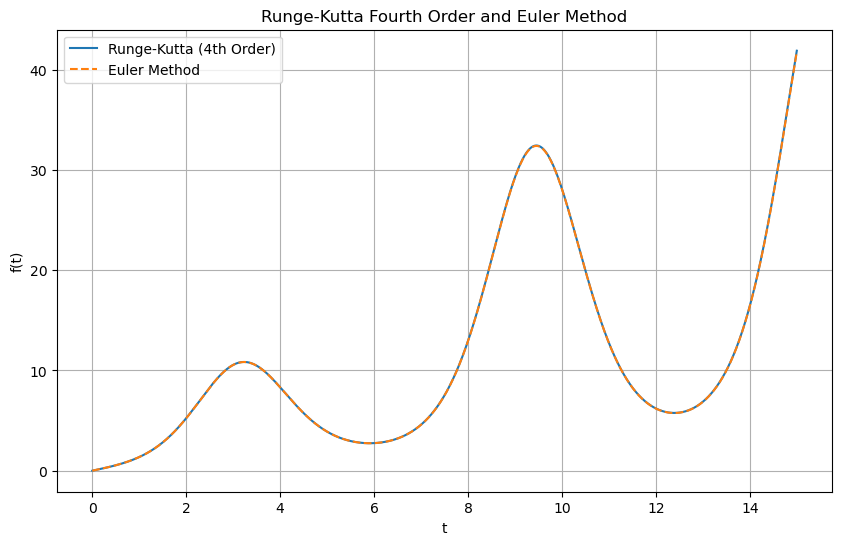

In [14]:
# a

# Formula for the fourth order Runge-Kutta method:
# k1 = F(f(t),t)
# k2 = F(f(t) + 1/2 * k1 * dt , t + 1/2 * dt)
# k3 = F(f(t) + 1/2 * k2 * dt , t + 1/2 * dt)
# k4 = F(f(t) + k3*dt , t + dt)

# f(t + dt) = f(t) + 1/6 * [k1 + 2*k2 + 2*k3 + k4] * dt

# Implement this method to solve:
# f'(t) = 1 + sin(t) * f(t)
# for t ∈ [0, 15] using Δt = 0.001 and f(0) = 0. Also implement the Euler
# method for this ODE and check that it gives the same result.

import numpy as np
import matplotlib.pyplot as plt

def f_derived(f, t):
    return 1 + np.sin(t) * f

def runge_kutta_fourth_order(f_0, dt, t_max):
    t_values = np.arange(0, t_max, dt)
    f_values = [f_0]

    for i in range(1, len(t_values)):
        t_i = t_values[i]
        f_i = f_values[i - 1]

        k1 = f_derived(f_i, t_i)
        k2 = f_derived(f_i + 0.5 * k1 * dt, t_i + 0.5 * dt)
        k3 = f_derived(f_i + 0.5 * k2 * dt, t_i + 0.5 * dt)
        k4 = f_derived(f_i + k3 * dt, t_i + dt)

        f_new = f_i + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4) * dt
        f_values.append(f_new)

    return t_values, f_values

def euler_method(f_0, dt, t_max):
    t_values = np.arange(0, t_max, dt)
    f_values = [f_0]

    for i in range(1, len(t_values)):
        t_i = t_values[i]
        f_i = f_values[i - 1]
        f_new = f_i + dt * f_derived(f_i, t_i)
        f_values.append(f_new)

    return t_values, f_values

f_0 = 0
dt = 0.001
t_max = 15

t_values_rk4, f_values_rk4 = runge_kutta_fourth_order(f_0, dt, t_max)

t_values_euler, f_values_euler = euler_method(f_0, dt, t_max)

plt.figure(figsize=(10, 6))
plt.plot(t_values_rk4, f_values_rk4, label='Runge-Kutta (4th Order)')
plt.plot(t_values_euler, f_values_euler, label='Euler Method', linestyle='dashed')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Runge-Kutta Fourth Order and Euler Method')
plt.legend()
plt.grid(True)
plt.show()





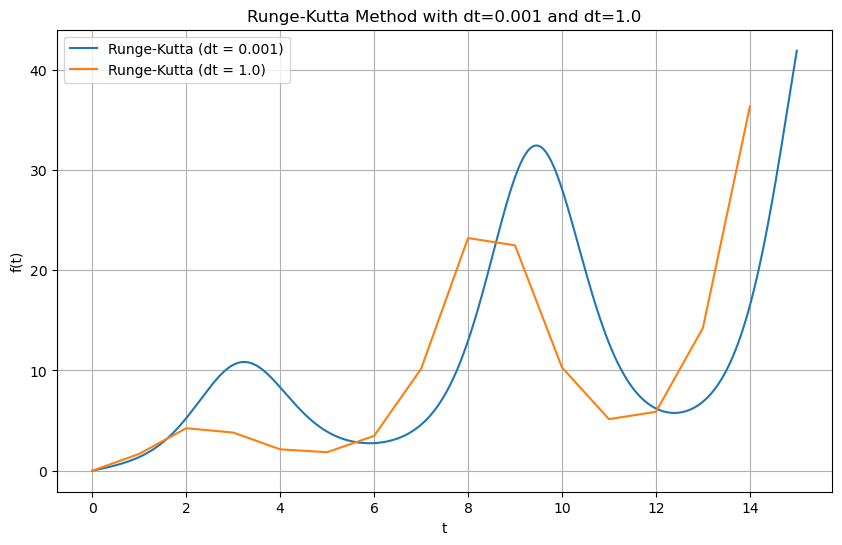

In [15]:
# b
# Now take Δt = 1.0 and solve the equation using the Runge–Kutta
# method. Plot the solution on top of the result with Δt = 0.001.

dt_small = 0.001
dt_large = 1.0
t_max = 15

t_values_rk4_small, f_values_rk4_small = runge_kutta_fourth_order(f_0, dt_small, t_max)

t_values_rk4_large, f_values_rk4_large = runge_kutta_fourth_order(f_0, dt_large, t_max)

plt.figure(figsize=(10, 6))
plt.plot(t_values_rk4_small, f_values_rk4_small, label=f'Runge-Kutta (dt = {dt_small})')
plt.plot(t_values_rk4_large, f_values_rk4_large, label=f'Runge-Kutta (dt = {dt_large})')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Runge-Kutta Method with dt=0.001 and dt=1.0')
plt.legend()
plt.grid(True)
plt.show()


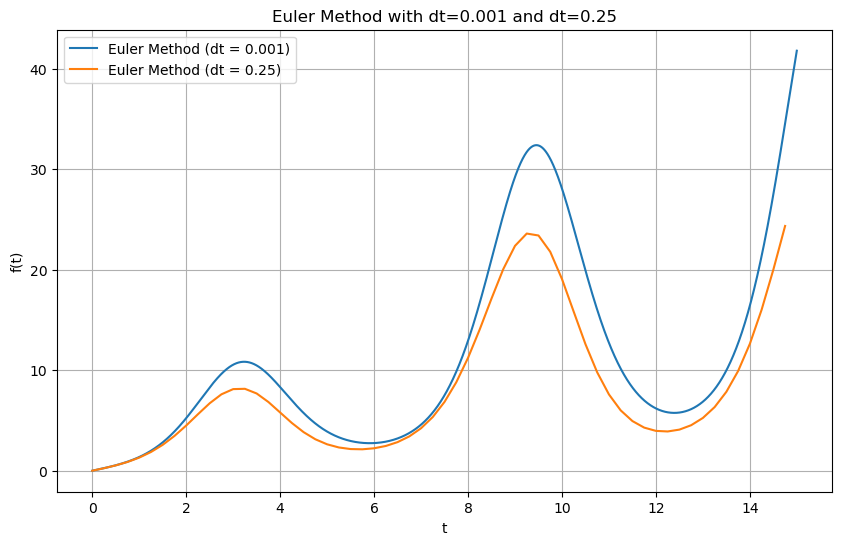

In [16]:
# c
# Take Δt = 0.25 and solve the equation using the Euler method.
# Plot the solution on top of the result with Δt = 0.001 and comment on the
# result.

dt_small = 0.001
dt_large = 0.25
t_max = 15

t_values_euler_small, f_values_euler_small = euler_method(f_0, dt_small, t_max)

t_values_euler_large, f_values_euler_large = euler_method(f_0, dt_large, t_max)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values_euler_small, f_values_euler_small, label='Euler Method (dt = 0.001)')
plt.plot(t_values_euler_large, f_values_euler_large, label='Euler Method (dt = 0.25)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Euler Method with dt=0.001 and dt=0.25')
plt.legend()
plt.grid(True)
plt.show()

